# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
import pandas as pd
import numpy as np

import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
)
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
)
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib
from scipy.stats import randint
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn: model selection + metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, roc_curve, auc,
    ConfusionMatrixDisplay
)

# Random distributions for RandomizedSearch
from scipy.stats import randint

# Save/load trained models
import joblib

import joblib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, roc_curve, auc,
    ConfusionMatrixDisplay
)


In [ ]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df.booking_origin.unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df.sales_channel.unique()

array(['Internet', 'Mobile'], dtype=object)

In [ ]:
le = LabelEncoder()
df_modified = df.copy(deep=True)
df_modified["sales_channel"] = le.fit_transform(df["sales_channel"])

df_modified.sales_channel.unique()

array([0, 1])

Mapping as following:

In [ ]:
print(le.classes_)

['Internet' 'Mobile']


In [ ]:
df_modified.trip_type.unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [ ]:
le = LabelEncoder()
df_modified["trip_type"] = le.fit_transform(df["trip_type"])

df_modified.trip_type.unique()

array([2, 0, 1])

Mapping as following:

In [ ]:
print(le.classes_)

['CircleTrip' 'OneWay' 'RoundTrip']


In [ ]:
df_modified.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,0,2,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,0,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,0,2,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,0,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df_modified.route.nunique()

799

In [ ]:
df_modified.booking_origin.nunique()

104

In [42]:
afghanistan_rows = df_modified[df_modified["booking_origin"] == "Brazil"].copy()
print(f"Number of rows where country = Brazil: {afghanistan_rows.shape[0]}")
afghanistan_rows.count()

Number of rows where country = Brazil: 0


,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


# **Finding co-rellation**

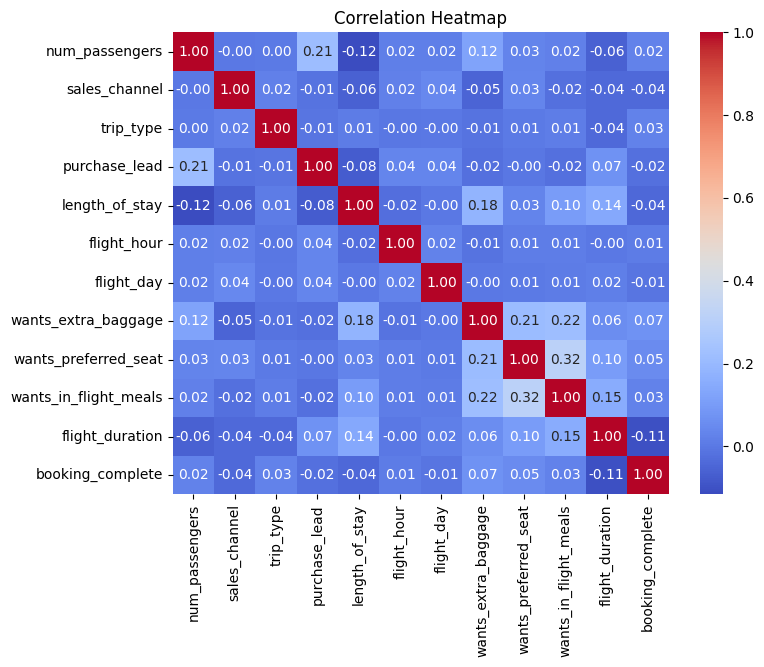

In [ ]:
corr = df_modified.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
route_mean = df_modified.groupby("route")["booking_complete"].mean()
origin_mean = df_modified.groupby("booking_origin")["booking_complete"].mean()

print(df_modified.groupby("booking_origin")["booking_complete"].mean().to_dict())

{'(not set)': 0.16666666666666666, 'Afghanistan': 0.0, 'Algeria': 0.0, 'Argentina': 0.0, 'Australia': 0.05035810205908684, 'Austria': 0.0, 'Bahrain': 0.6, 'Bangladesh': 0.05555555555555555, 'Belarus': 0.0, 'Belgium': 0.14285714285714285, 'Bhutan': 0.0, 'Brazil': 0.0, 'Brunei': 0.24550898203592814, 'Bulgaria': 0.0, 'Cambodia': 0.2727272727272727, 'Canada': 0.03508771929824561, 'Chile': 0.058823529411764705, 'China': 0.20490109241216417, 'Colombia': 0.0, 'Croatia': 0.0, 'Cyprus': 0.0, 'Czech Republic': 0.125, 'Czechia': 0.0, 'Denmark': 0.42857142857142855, 'Egypt': 0.0, 'Estonia': 0.0, 'Finland': 0.0, 'France': 0.23728813559322035, 'Germany': 0.21052631578947367, 'Ghana': 0.0, 'Gibraltar': 0.0, 'Greece': 0.14285714285714285, 'Guam': 0.0, 'Guatemala': 0.0, 'Hong Kong': 0.24745762711864408, 'Hungary': 0.0, 'India': 0.1031496062992126, 'Indonesia': 0.2596032081046855, 'Iran': 0.0, 'Iraq': 1.0, 'Ireland': 0.0, 'Israel': 0.0, 'Italy': 0.1896551724137931, 'Japan': 0.12303732303732304, 'Jordan'

In [ ]:
print(df_modified.groupby("route")["booking_complete"].mean().to_dict())

{'AKLDEL': 0.0, 'AKLHGH': 0.0, 'AKLHND': 0.0, 'AKLICN': 0.0, 'AKLKIX': 0.0, 'AKLKTM': 0.0, 'AKLKUL': 0.21156716417910448, 'AKLMRU': 0.0, 'AKLPEK': 0.8, 'AKLPVG': 0.3333333333333333, 'AKLTPE': 0.0, 'AORICN': 0.3888888888888889, 'AORKIX': 0.3333333333333333, 'AORKTM': 0.11764705882352941, 'AORMEL': 0.22727272727272727, 'AORPER': 1.0, 'AORPUS': 1.0, 'BBIMEL': 0.0, 'BBIOOL': 0.0, 'BBIPER': 0.0, 'BBISYD': 0.18181818181818182, 'BDOCTS': 0.0, 'BDOCTU': 0.0, 'BDOHGH': 0.08695652173913043, 'BDOICN': 0.2857142857142857, 'BDOIKA': 0.0, 'BDOKIX': 0.2545454545454545, 'BDOMEL': 0.27586206896551724, 'BDOOOL': 0.2, 'BDOPEK': 0.07692307692307693, 'BDOPER': 0.2, 'BDOPUS': 0.08333333333333333, 'BDOPVG': 0.6666666666666666, 'BDOSYD': 0.16129032258064516, 'BDOTPE': 0.2, 'BDOWUH': 0.0, 'BDOXIY': 0.0, 'BKICKG': 0.0, 'BKICTS': 0.12, 'BKICTU': 0.36363636363636365, 'BKIDEL': 0.25, 'BKIHND': 0.24369747899159663, 'BKIICN': 0.40654205607476634, 'BKIKIX': 0.35051546391752575, 'BKIKTM': 0.8333333333333334, 'BKIMEL':

In [ ]:
routes_to_drop = route_mean[route_mean == 0].index
origins_to_drop = origin_mean[origin_mean == 0].index

print(f"Routes to drop (never booked): {len(routes_to_drop)}")
print(f"Origins to drop (never booked): {len(origins_to_drop)}")

df_cleaned = df_modified[
    ~df_modified["route"].isin(routes_to_drop) &
    ~df_modified["booking_origin"].isin(origins_to_drop)
].copy()

print("Original shape:", df_modified.shape)
print("Cleaned shape:", df_cleaned.shape)


Routes to drop (never booked): 250
Origins to drop (never booked): 46
Original shape: (50000, 14)
Cleaned shape: (47154, 14)


In [ ]:
df_modified["route"] = df_modified["route"].map(route_mean)
df_modified["booking_origin"] = df_modified["booking_origin"].map(origin_mean)

In [ ]:
df_modified.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,6,0.0,0.050279,1,0,0,5.52,0
1,1,0,2,112,20,3,6,0.0,0.050279,0,0,0,5.52,0
2,2,0,2,243,22,17,3,0.0,0.103150,1,1,0,5.52,0
3,1,0,2,96,31,4,6,0.0,0.050279,0,0,1,5.52,0
4,2,0,2,68,22,15,3,0.0,0.103150,1,0,1,5.52,0


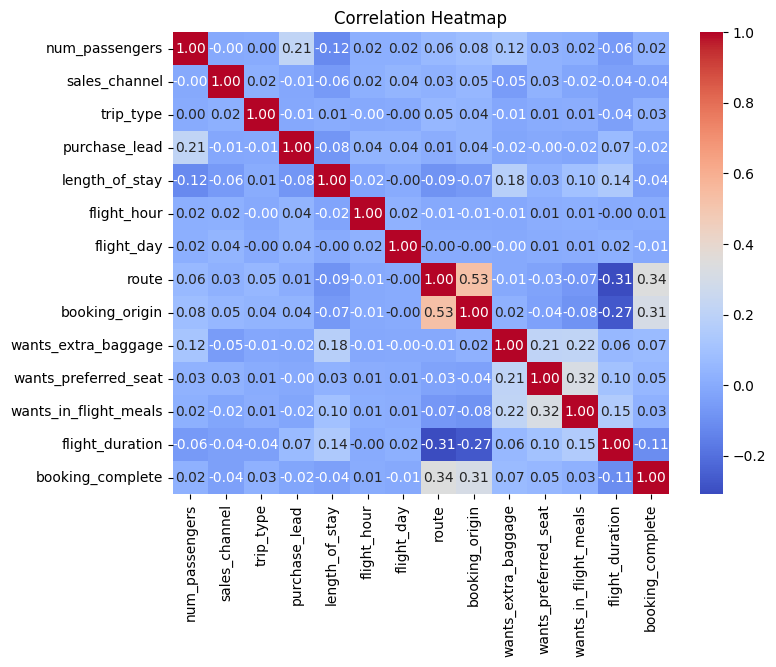

In [ ]:
corr = df_modified.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

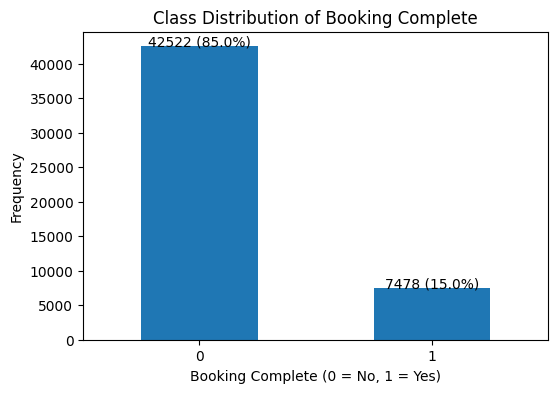

In [ ]:
class_counts = df_modified["booking_complete"].value_counts()

plt.figure(figsize=(6,4))
class_counts.plot(kind='bar')

plt.title("Class Distribution of Booking Complete")
plt.xlabel("Booking Complete (0 = No, 1 = Yes)")
plt.ylabel("Frequency")
plt.xticks(rotation=0)

for i, val in enumerate(class_counts):
    plt.text(i, val + 50, f"{val} ({val/class_counts.sum():.1%})", ha='center')

plt.show()

In [ ]:
X = df_modified.drop("booking_complete", axis=1)
y = df_modified["booking_complete"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

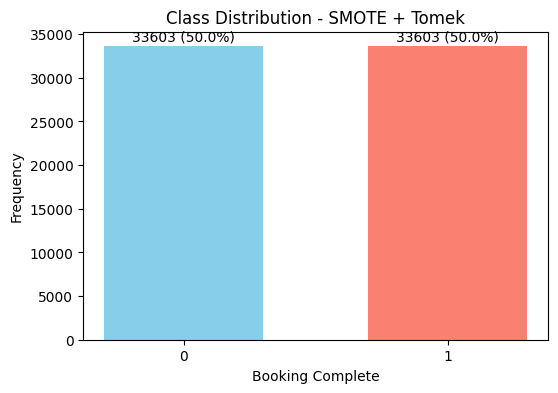

In [ ]:
smote_tomek = SMOTETomek(random_state=42)
X_train_st, y_train_st = smote_tomek.fit_resample(X_train, y_train)

counts = y_train_st.value_counts().sort_index()
labels = [str(c) for c in counts.index]

plt.figure(figsize=(6,4))
bars = plt.bar(labels, counts.values, color=["skyblue", "salmon"], width=0.6)
plt.title("Class Distribution - SMOTE + Tomek")
plt.xlabel("Booking Complete")
plt.ylabel("Frequency")

total = counts.sum()
for i, val in enumerate(counts.values):
    plt.text(i, val + total*0.01, f"{val} ({val/total:.1%})", ha='center')

plt.show()

In [ ]:
Xy_train_st = pd.DataFrame(X_train_st, columns=X_train.columns)
Xy_train_st["booking_complete"] = y_train_st.reset_index(drop=True)

print("Resampled training set shape:", Xy_train_st.shape)

Resampled training set shape: (67206, 14)


In [ ]:
def evaluate_at_threshold(threshold):
    y_pred = (y_test_prob >= threshold).astype(int)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    rocauc = roc_auc_score(y_test, y_test_prob)

    print(f"\n--- Threshold = {threshold:.2f} ---")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print(f"ROC-AUC  : {rocauc:.4f}")
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    fig, ax = plt.subplots(figsize=(6, 5))
    disp.plot(ax=ax, cmap="Blues", values_format="d")
    ax.set_title(f"Confusion Matrix (Threshold={threshold})")
    plt.show()

Inner train shape: (53764, 13) Inner val shape: (13442, 13)


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



--- 6-Fold Cross Validation Results ---
Accuracy : 0.8967 ± 0.0024
Precision: 0.8960 ± 0.0049
Recall   : 0.8976 ± 0.0044
F1 Score : 0.8968 ± 0.0022
ROC-AUC  : 0.9647 ± 0.0010

Final model saved to rf_cv6_final.pkl

--- Threshold = 0.40 ---
Accuracy : 0.7870
Precision: 0.3601
Recall   : 0.5455
F1 Score : 0.4338
ROC-AUC  : 0.7942

Classification Report:

              precision    recall  f1-score   support

           0     0.9121    0.8295    0.8688      8504
           1     0.3601    0.5455    0.4338      1496

    accuracy                         0.7870     10000
   macro avg     0.6361    0.6875    0.6513     10000
weighted avg     0.8295    0.7870    0.8037     10000

Confusion Matrix:
 [[7054 1450]
 [ 680  816]]


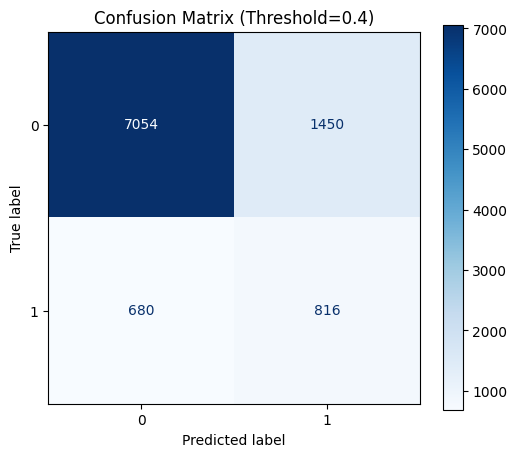

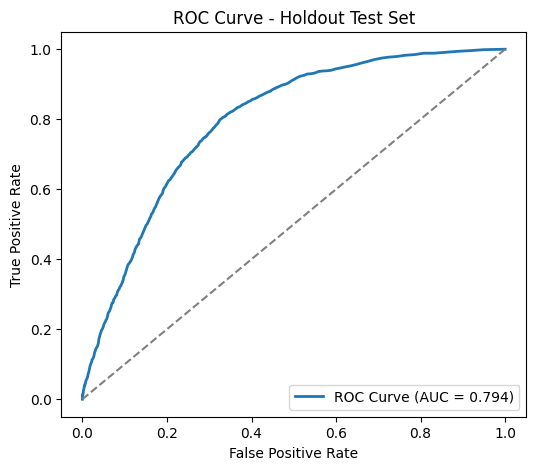

In [ ]:
features = Xy_train_st.drop(columns=["booking_complete"])
target = Xy_train_st["booking_complete"]

X_inner_train, X_inner_val, y_inner_train, y_inner_val = train_test_split(
    features, target, test_size=0.2, stratify=target, random_state=42
)

print("Inner train shape:", X_inner_train.shape, "Inner val shape:", X_inner_val.shape)


rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

cv_accuracy = cross_val_score(rf, features, target, cv=cv, scoring="accuracy", n_jobs=-1)
cv_precision = cross_val_score(rf, features, target, cv=cv, scoring="precision", n_jobs=-1)
cv_recall = cross_val_score(rf, features, target, cv=cv, scoring="recall", n_jobs=-1)
cv_f1 = cross_val_score(rf, features, target, cv=cv, scoring="f1", n_jobs=-1)
cv_auc = cross_val_score(rf, features, target, cv=cv, scoring="roc_auc", n_jobs=-1)

print("\n--- 6-Fold Cross Validation Results ---")
print(f"Accuracy : {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
print(f"Precision: {cv_precision.mean():.4f} ± {cv_precision.std():.4f}")
print(f"Recall   : {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")
print(f"F1 Score : {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")
print(f"ROC-AUC  : {cv_auc.mean():.4f} ± {cv_auc.std():.4f}")

rf.fit(features, target)
model_filename = "rf_cv6_final.pkl"
joblib.dump(rf, model_filename)
print(f"\nFinal model saved to {model_filename}")

y_test_prob = rf.predict_proba(X_test)[:, 1]
evaluate_at_threshold(0.40)

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, lw=2, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Holdout Test Set")
plt.legend(loc="lower right")
plt.show()


Inner train shape: (53764, 13) Inner val shape: (13442, 13)

--- 6-Fold Cross Validation Results ---
Accuracy : 0.8520 ± 0.0030
Precision: 0.8250 ± 0.0053
Recall   : 0.8936 ± 0.0027
F1 Score : 0.8579 ± 0.0024
ROC-AUC  : 0.9406 ± 0.0017

Final model saved to rf_skfold_final.pkl

--- Threshold = 0.40 ---
Accuracy : 0.7405
Precision: 0.3274
Recall   : 0.6965
F1 Score : 0.4454
ROC-AUC  : 0.7854

Classification Report:

              precision    recall  f1-score   support

           0     0.9334    0.7482    0.8306      8504
           1     0.3274    0.6965    0.4454      1496

    accuracy                         0.7405     10000
   macro avg     0.6304    0.7224    0.6380     10000
weighted avg     0.8427    0.7405    0.7730     10000

Confusion Matrix:
 [[6363 2141]
 [ 454 1042]]


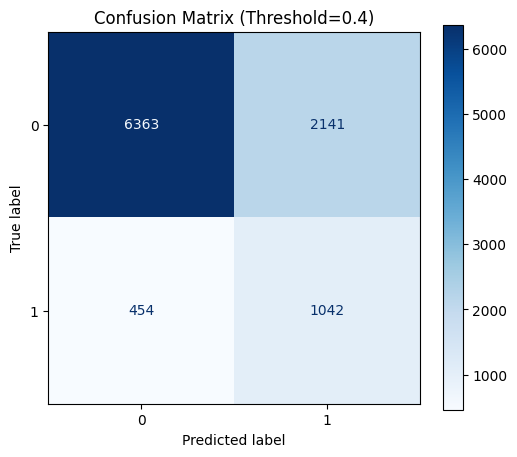

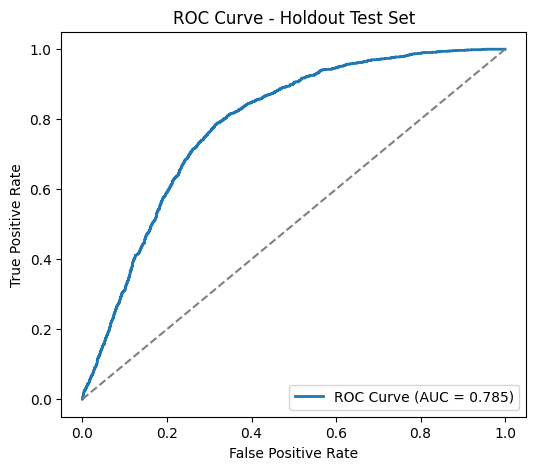

In [ ]:
features = Xy_train_st.drop(columns=["booking_complete"])
target = Xy_train_st["booking_complete"]

X_inner_train, X_inner_val, y_inner_train, y_inner_val = train_test_split(
    features, target, test_size=0.2, stratify=target, random_state=42
)

print("Inner train shape:", X_inner_train.shape, "Inner val shape:", X_inner_val.shape)

rf = RandomForestClassifier(
    n_estimators=134,
    max_depth=14,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced",
    min_samples_leaf=8,
    min_samples_split=8
)

cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

cv_accuracy = cross_val_score(rf, features, target, cv=cv, scoring="accuracy", n_jobs=-1)
cv_precision = cross_val_score(rf, features, target, cv=cv, scoring="precision", n_jobs=-1)
cv_recall = cross_val_score(rf, features, target, cv=cv, scoring="recall", n_jobs=-1)
cv_f1 = cross_val_score(rf, features, target, cv=cv, scoring="f1", n_jobs=-1)
cv_auc = cross_val_score(rf, features, target, cv=cv, scoring="roc_auc", n_jobs=-1)

print("\n--- 6-Fold Cross Validation Results ---")
print(f"Accuracy : {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
print(f"Precision: {cv_precision.mean():.4f} ± {cv_precision.std():.4f}")
print(f"Recall   : {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")
print(f"F1 Score : {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")
print(f"ROC-AUC  : {cv_auc.mean():.4f} ± {cv_auc.std():.4f}")

rf.fit(features, target)
model_filename = "rf_skfold_final.pkl"
joblib.dump(rf, model_filename)
print(f"\nFinal model saved to {model_filename}")

y_test_prob = rf.predict_proba(X_test)[:, 1]
evaluate_at_threshold(0.40)

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, lw=2, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Holdout Test Set")
plt.legend(loc="lower right")
plt.show()

Inner train shape: (53764, 13) Inner val shape: (13442, 13)
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Best parameters found: {'max_depth': 14, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 134}
Best F1 score on inner CV: 0.8695999597362821

Best model saved as rf_best_randomized.pkl

--- Threshold = 0.40 ---
Accuracy : 0.7888
Precision: 0.3549905838041431
Recall   : 0.5040106951871658
F1 Score : 0.4165745856353591
ROC-AUC  : 0.7917535503896248

Classification Report:

              precision    recall  f1-score   support

           0     0.9058    0.8389    0.8711      8504
           1     0.3550    0.5040    0.4166      1496

    accuracy                         0.7888     10000
   macro avg     0.6304    0.6715    0.6438     10000
weighted avg     0.8234    0.7888    0.8031     10000

Confusion Matrix:
 [[7134 1370]
 [ 742  754]]


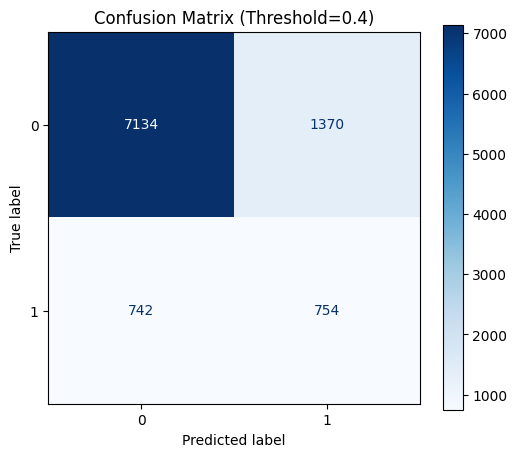

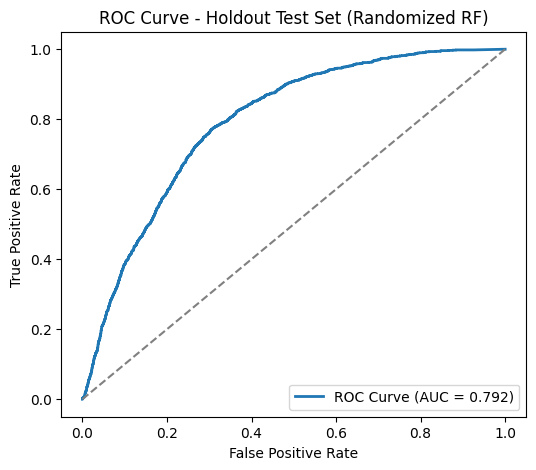

In [ ]:
features = Xy_train_st.drop(columns=["booking_complete"])
target = Xy_train_st["booking_complete"]

X_inner_train, X_inner_val, y_inner_train, y_inner_val = train_test_split(
    features, target, test_size=0.2, stratify=target, random_state=42
)

print("Inner train shape:", X_inner_train.shape, "Inner val shape:", X_inner_val.shape)

rf_base = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

param_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": randint(3, 15),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 10),
    "max_features": ["sqrt", "log2", None]
}

random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=50,
    scoring="f1",
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_inner_train, y_inner_train)

print("\nBest parameters found:", random_search.best_params_)
print("Best F1 score on inner CV:", random_search.best_score_)

rf_best = random_search.best_estimator_

joblib.dump(rf_best, "rf_best_randomized.pkl")
print("\nBest model saved as rf_best_randomized.pkl")

y_test_prob = rf_best.predict_proba(X_test)[:, 1]

threshold = 0.40
y_test_pred_thresh = (y_test_prob >= threshold).astype(int)

acc = accuracy_score(y_test, y_test_pred_thresh)
prec = precision_score(y_test, y_test_pred_thresh, zero_division=0)
rec = recall_score(y_test, y_test_pred_thresh)
f1 = f1_score(y_test, y_test_pred_thresh)
rocauc = roc_auc_score(y_test, y_test_prob)

print(f"\n--- Threshold = {threshold:.2f} ---")
print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)
print("ROC-AUC  :", rocauc)

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred_thresh, digits=4))

cm = confusion_matrix(y_test, y_test_pred_thresh)
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
fig, ax = plt.subplots(figsize=(6,5))
disp.plot(ax=ax, cmap="Blues", values_format="d")
ax.set_title(f"Confusion Matrix (Threshold={threshold})")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, lw=2, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Holdout Test Set (Randomized RF)")
plt.legend(loc="lower right")
plt.show()

Inner train shape: (53764, 9) Inner val shape: (13442, 9)


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



--- 6-Fold Cross Validation Results ---
Accuracy : 0.8998 ± 0.0028
Precision: 0.9105 ± 0.0055
Recall   : 0.8868 ± 0.0045
F1 Score : 0.8985 ± 0.0028
ROC-AUC  : 0.9648 ± 0.0014

Final model saved to rf_cv6_feature_dropped.pkl

--- Threshold = 0.40 ---
Accuracy : 0.7953
Precision: 0.3582
Recall   : 0.4652
F1 Score : 0.4048
ROC-AUC  : 0.7873

Classification Report:

              precision    recall  f1-score   support

           0     0.9007    0.8534    0.8764      8504
           1     0.3582    0.4652    0.4048      1496

    accuracy                         0.7953     10000
   macro avg     0.6295    0.6593    0.6406     10000
weighted avg     0.8195    0.7953    0.8058     10000

Confusion Matrix:
 [[7257 1247]
 [ 800  696]]


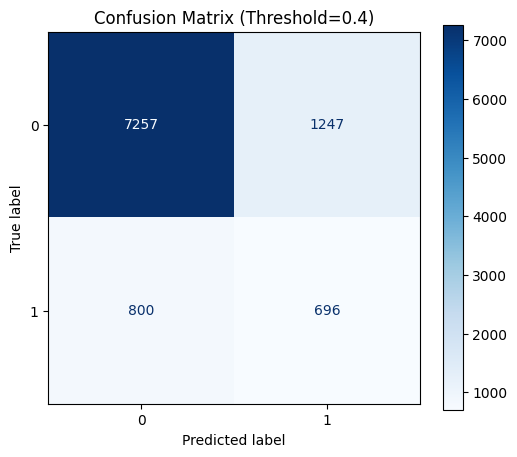

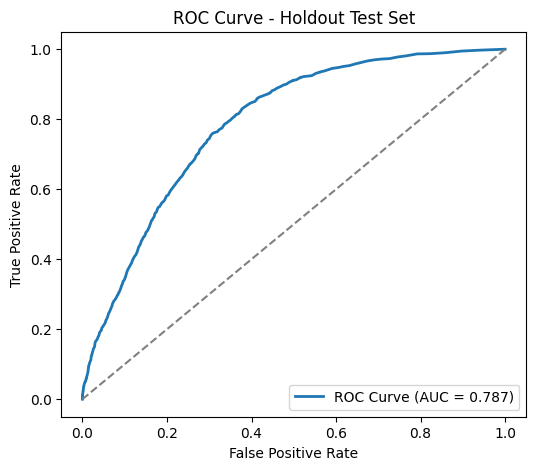

In [35]:
Xy_train_copy = Xy_train_st.copy()
X_test_copy = X_test.copy()

drop_cols = [
    "trip_type",
    "wants_extra_baggage",
    "wants_in_flight_meals",
    "wants_preferred_seat"
]

features = Xy_train_copy.drop(columns=["booking_complete"] + drop_cols)
target = Xy_train_copy["booking_complete"]

X_test_copy = X_test_copy.drop(columns=drop_cols)

X_inner_train, X_inner_val, y_inner_train, y_inner_val = train_test_split(
    features, target, test_size=0.2, stratify=target, random_state=42
)

print("Inner train shape:", X_inner_train.shape, "Inner val shape:", X_inner_val.shape)

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

cv_accuracy = cross_val_score(rf, features, target, cv=cv, scoring="accuracy", n_jobs=-1)
cv_precision = cross_val_score(rf, features, target, cv=cv, scoring="precision", n_jobs=-1)
cv_recall = cross_val_score(rf, features, target, cv=cv, scoring="recall", n_jobs=-1)
cv_f1 = cross_val_score(rf, features, target, cv=cv, scoring="f1", n_jobs=-1)
cv_auc = cross_val_score(rf, features, target, cv=cv, scoring="roc_auc", n_jobs=-1)

print("\n--- 6-Fold Cross Validation Results ---")
print(f"Accuracy : {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
print(f"Precision: {cv_precision.mean():.4f} ± {cv_precision.std():.4f}")
print(f"Recall   : {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")
print(f"F1 Score : {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")
print(f"ROC-AUC  : {cv_auc.mean():.4f} ± {cv_auc.std():.4f}")

rf.fit(features, target)
model_filename = "rf_cv6_feature_dropped.pkl"
joblib.dump(rf, model_filename)
print(f"\nFinal model saved to {model_filename}")

y_test_prob = rf.predict_proba(X_test_copy)[:, 1]
evaluate_at_threshold(0.40)

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, lw=2, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Holdout Test Set")
plt.legend(loc="lower right")
plt.show()



--- Threshold 0.3 ---
Accuracy: 0.7433, Precision: 0.3296, Recall: 0.6925, F1: 0.4466, ROC-AUC: 0.7942
              precision    recall  f1-score   support

           0     0.9329    0.7522    0.8329      8504
           1     0.3296    0.6925    0.4466      1496

    accuracy                         0.7433     10000
   macro avg     0.6313    0.7224    0.6398     10000
weighted avg     0.8427    0.7433    0.7751     10000



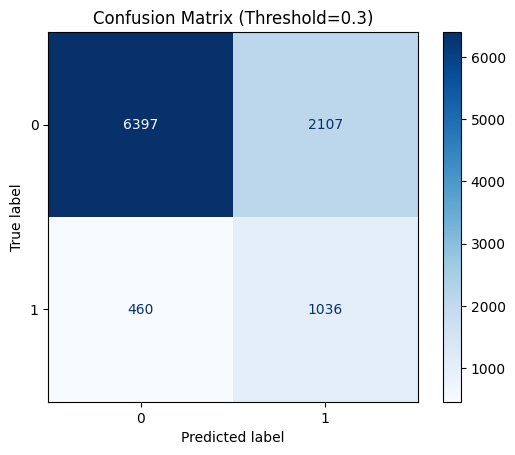


--- Threshold 0.4 ---
Accuracy: 0.7870, Precision: 0.3601, Recall: 0.5455, F1: 0.4338, ROC-AUC: 0.7942
              precision    recall  f1-score   support

           0     0.9121    0.8295    0.8688      8504
           1     0.3601    0.5455    0.4338      1496

    accuracy                         0.7870     10000
   macro avg     0.6361    0.6875    0.6513     10000
weighted avg     0.8295    0.7870    0.8037     10000



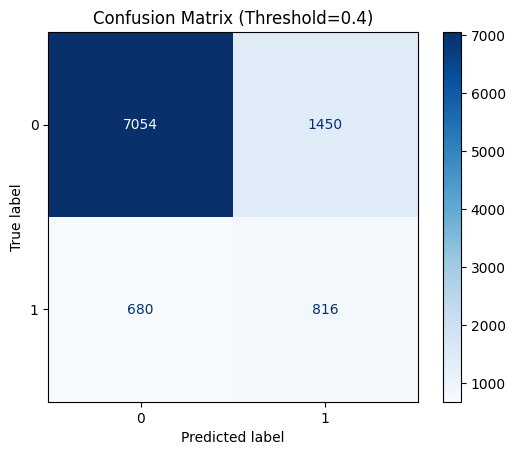


--- Threshold 0.5 ---
Accuracy: 0.8170, Precision: 0.3856, Recall: 0.3763, F1: 0.3809, ROC-AUC: 0.7942
              precision    recall  f1-score   support

           0     0.8907    0.8945    0.8926      8504
           1     0.3856    0.3763    0.3809      1496

    accuracy                         0.8170     10000
   macro avg     0.6382    0.6354    0.6368     10000
weighted avg     0.8152    0.8170    0.8161     10000



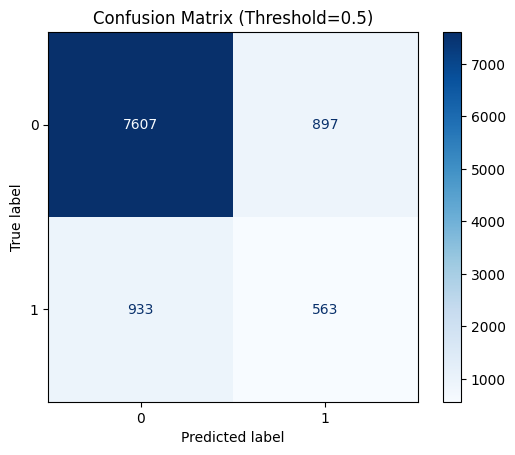


All Results:
    Threshold  Accuracy  Precision    Recall        F1   ROC-AUC
0        0.3    0.7433   0.329621  0.692513  0.446648  0.794234
1        0.4    0.7870   0.360106  0.545455  0.433812  0.794234
2        0.5    0.8170   0.385616  0.376337  0.380920  0.794234


In [39]:
rf_best = joblib.load("rf_cv6_final.pkl")

y_test_prob = rf_best.predict_proba(X_test)[:, 1]

thresholds = [0.3, 0.4, 0.5]
results = []

for t in thresholds:
    y_pred = (y_test_prob >= t).astype(int)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    rocauc = roc_auc_score(y_test, y_test_prob)
    results.append([t, acc, prec, rec, f1, rocauc])
    print(f"\n--- Threshold {t} ---")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, ROC-AUC: {rocauc:.4f}")
    print(classification_report(y_test, y_pred, digits=4))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot(cmap="Blues")
    plt.title(f"Confusion Matrix (Threshold={t})")
    plt.show()

df_results = pd.DataFrame(results, columns=["Threshold", "Accuracy", "Precision", "Recall", "F1", "ROC-AUC"])
print("\nAll Results:\n", df_results)

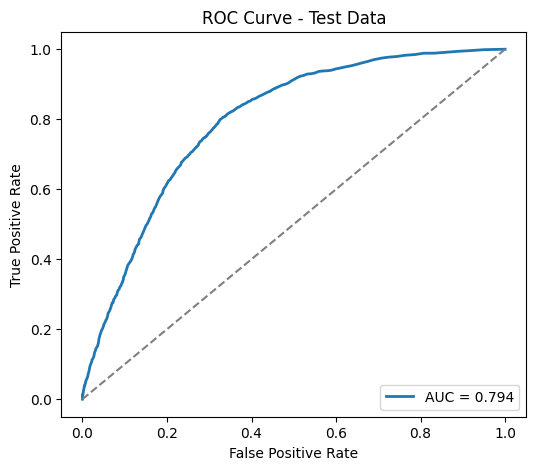

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Test Data")
plt.legend(loc="lower right")
plt.show()

/tmp/ipython-input-2433020843.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp.head(15), palette="viridis")


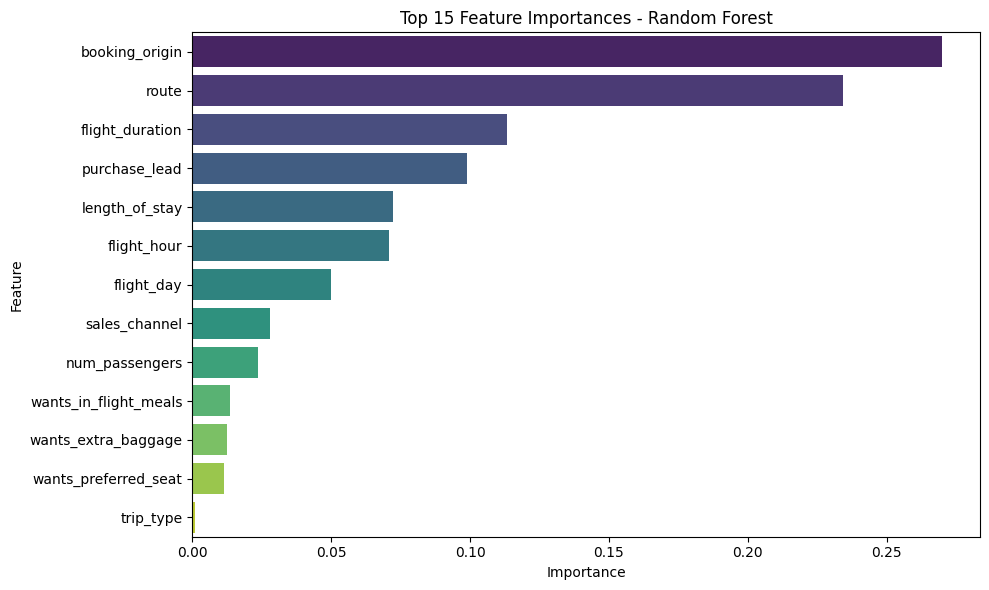

In [41]:
importances = rf_best.feature_importances_
feature_names = X_train.columns

feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp.sort_values("Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(15), palette="viridis")
plt.title("Top 15 Feature Importances - Random Forest")
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()